<a href="https://colab.research.google.com/github/juanxo90/MLops-Zoomcamp/blob/main/NYC_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
df_tj = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet')
df_tf = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet')

In [ ]:
len(df_tj.columns)

19

the dataframe has **19** columns

In [ ]:
df_tj['duration'] = (df_tj.tpep_dropoff_datetime 
                     - df_tj.tpep_pickup_datetime).astype('timedelta64[s]') / 60

df_tf['duration'] = (df_tf.tpep_dropoff_datetime 
                     - df_tf.tpep_pickup_datetime).astype('timedelta64[s]') / 60

In [ ]:
round(df_tj.duration.std(), 2)

46.45

The std dev is 46.45

<Axes: >

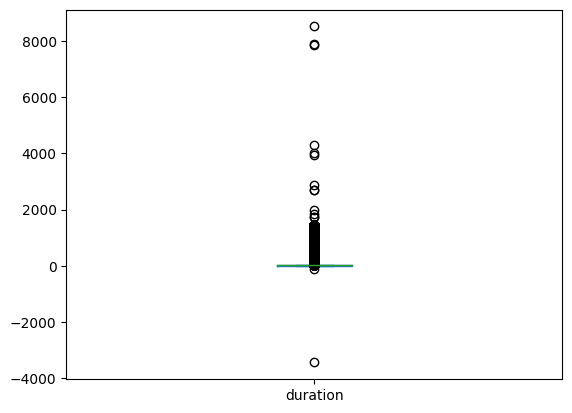

In [ ]:
mask = df_tj.duration > 0
df_tj.duration.plot.box()

In [ ]:
round(df_tj.duration.describe(),2)

count    2463931.00
mean          14.21
std           46.45
min        -3442.40
25%            6.32
50%           10.18
75%           16.17
max         8513.18
Name: duration, dtype: float64

In [ ]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outlier = find_outliers_IQR(df_tj.duration)

In [ ]:
print('number of outliers: '+ str(len(outlier)))
print('max outlier value: ' + str(outlier.max()))
print('min outlier value: ' + str(outlier.min()))

number of outliers: 134982
max outlier value: 8513.183333333332
min outlier value: -3442.4


In [ ]:
percentaje_out = (len(df_tj[df_tj.duration.between(1,60)]) 
                  * 100) / len(df_tj)
round(percentaje_out, 0)

98.0

El porcenaje de retencion es del **98%**

In [ ]:
df_tj = df_tj[df_tj.duration.between(1,60)]
df_tf = df_tf[df_tf.duration.between(1,60)]

In [ ]:
 categorical = ['PULocationID', 'DOLocationID']
#  numerical = ['trip_distance']

In [ ]:
df_tj[categorical] = df_tj[categorical].astype(str)

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
train_dicts = df_tj[categorical].to_dict(orient='records')

In [ ]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [ ]:
X_train

<2421440x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

the dimensionality is **515**

In [ ]:
len(dv.feature_names_)

515

In [ ]:
target = 'duration'
y_train = df_tj[target].values

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict = lr.predict(X_train)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-26-cf7e33023c81>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predict, label='prediction')
<ipython-input-26-cf7e33023c81>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='original')


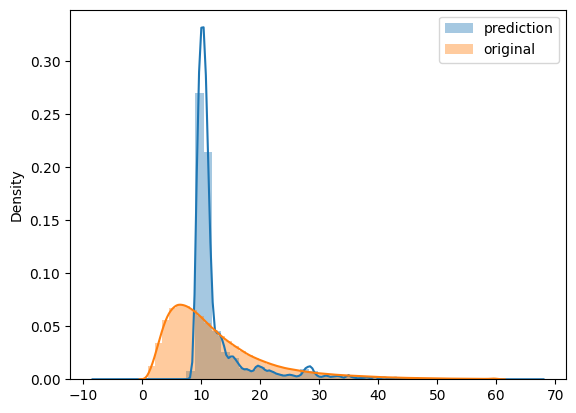

In [ ]:
sns.distplot(y_predict, label='prediction')
sns.distplot(y_train, label='original')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_train, y_predict, squared=False)

6.986190742248472

In [ ]:
categorical = ['PULocationID', 'DOLocationID']

dv = DictVectorizer()

train_dicts = df_tj[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_tf[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)


In [ ]:
target = 'duration'
y_train = df_tj[target].values
y_val = df_tf[target].values

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_predict = lr.predict(X_val)

mean_squared_error(y_val, y_predict, squared=False)



14.618876140917001